In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture as GMM

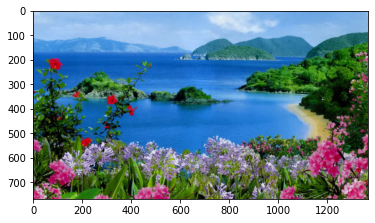

In [3]:
img = cv2.imread('/content/gdrive/My Drive/dataset/SN.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img2 = img.reshape((-1,3))

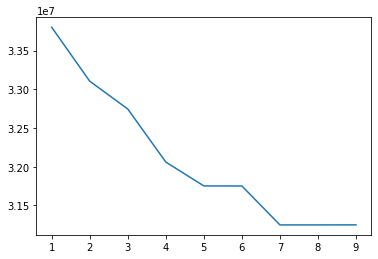

In [4]:
n_components = np.arange(1, 10)
gmm_models = [GMM(n, covariance_type = 'tied').fit(img2) for n in n_components]
plt.plot(n_components, [m.bic(img2) for m in gmm_models], label = 'BIC')

In [5]:
gmm_model = GMM(n_components = 5, covariance_type = 'tied').fit(img2)
gmm_labels = gmm_model.predict(img2)

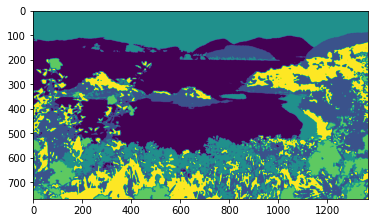

In [6]:
original_shape = img.shape
segmented = gmm_labels.reshape(original_shape[0], original_shape[1])
plt.imshow(segmented)
